# DemoMitIris 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn


In [2]:
iris_df = pd.read_csv(r'C:\Users\johan\bwSyncShare\Phyton\Data\iris_data.csv')

In [3]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
iris_df.head(20)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [5]:
iris_df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [6]:
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
iris_df.shape

(150, 5)

Scatterplot von 2 Merkmalen: Shaftblattlänge zu Breite
Verschiedene Species unterschiedlich einfärben
--> Klassifikationsmöglichkeit beurteilen

In [8]:
colors = {'setosa':'r','versicolor':'g','virginica':'b'} # Farben für Kategorien

Text(0, 0.5, 'Sepal_Width')

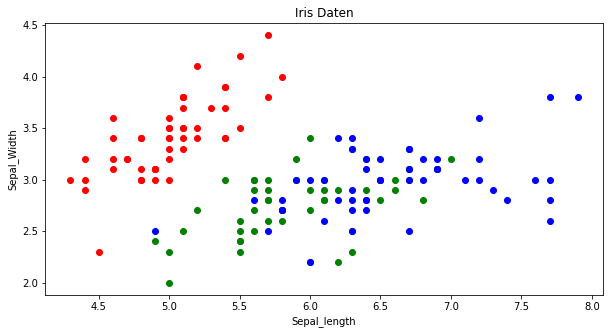

In [9]:
fig, ax = plt.subplots(figsize=(10,5)) #Größe Plot  konfigurieren

for i  in range(len(iris_df['sepal_length'])):
    ax.scatter(iris_df['sepal_length'][i],
               iris_df['sepal_width'][i],
               color=colors[iris_df['species'][i]])
    
ax.set_title('Iris Daten')
ax.set_xlabel('Sepal_length')
ax.set_ylabel('Sepal_Width')

Klassen statt mit Namen mit Zahlen bezeichnen

In [10]:
iris_names_df = iris_df #alten dataframe sichern

In [11]:
species_to_int ={'setosa':0,'versicolor':1, 'virginica':2} # Für jede Klasse eindeutige Zahl setzen

iris_df['species']=iris_df['species'].map(species_to_int) # Klassenspalte überschreiben mit Zahlen
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Daten Visualieren, Merkmale und Kategorien

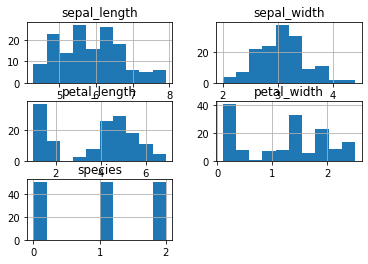

In [12]:
iris_df.hist() #berechnet Histogramme aller Spalten
plt.show()

Scattermatrix erstellen als schnellen Überblick

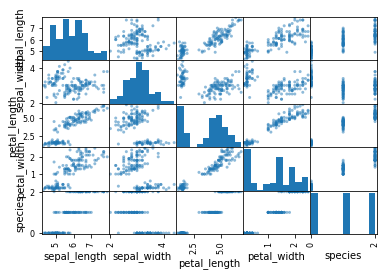

In [13]:
from pandas.plotting import scatter_matrix
scatter_matrix(iris_df)
plt.show()

Daten nach Merkmalsmatrix und Ergebnisvektor (Klassifikation) trennen

In [14]:
X = iris_df.iloc[:,:-1] #alles außer letzter Spalte
y = iris_df.iloc[:,-1] #nur letzte Spalte

In [15]:
X.shape

(150, 4)

In [16]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [17]:
print('Ergebnisspaltengroesse: ',y.shape)

Ergebnisspaltengroesse:  (150,)


Trainings- und Testdatensatz zufaellig erzeugen

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,
                                                   random_state=42)

print('X_train: ',X_train.shape, 'y_train: ', y_train.shape)
print('X_test: ', X_test.shape, 'y_test: ', y_test.shape)

X_train:  (120, 4) y_train:  (120,)
X_test:  (30, 4) y_test:  (30,)


In [19]:
X_train.head()

,sepal_length,sepal_width,petal_length,petal_width
22,4.6,3.6,1.0,0.2
15,5.7,4.4,1.5,0.4
65,6.7,3.1,4.4,1.4
11,4.8,3.4,1.6,0.2
42,4.4,3.2,1.3,0.2


## Bayes Klassifikator

3 Klassen
4 Dimensionaler Merkmalsvektor

In [20]:
from sklearn.naive_bayes import GaussianNB #importiere Bayes-Klassifikator

bayes_clf = GaussianNB() #zuweisen Verfahren zu Klassifikator_Variable

bayes_clf.fit(X_train,y_train) #Klassifikator anwenden auf Trainingsdaten

print('Accuracy Bayes:', bayes_clf.score(X_test,y_test))

Accuracy Bayes: 1.0


#### Kennzahlen

In [21]:
from sklearn.metrics import confusion_matrix
y_pred_test = bayes_clf.predict(X_test) #wende Modell (Bayes) auf testdaten an

print(confusion_matrix(y_test,y_pred_test)) #vergleiche testdaten mit vorhergesagten

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [22]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



#### Einzelnen Merkmalsvektor vom Modell klassifizeiren lassen

In [23]:
X_testEins = pd.DataFrame([[5.1,2.9,1.6,0.3]],columns=['sepal_length',
                                                      'sepal_width',
                                                      'petal_length',
                                                      'petal_width'])
# Kategorie soll vom Klassifikator vrohergesagt werden

y_predEins = bayes_clf.predict(X_testEins) #Vorhersage
print('Vorhergesagte Kategorie: ', y_predEins)

Vorhergesagte Kategorie:  [0]


In [24]:
y_predEins_W = bayes_clf.predict_proba(X_testEins) # Vorhersage mit Wahrscheinlichkeitsvektor

In [25]:
y_predEins_W

array([[1.00000000e+00, 1.28457025e-13, 1.41910452e-21]])

### Entscheidungsbaum

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

tree_clf = DecisionTreeClassifier()

tree_clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [27]:
print('Accuracy Decisiontree', tree_clf.score(X_test,y_test)) 
#nach Generalisierung

Accuracy Decisiontree 1.0


[Text(103.01538461538462, 201.90857142857143, 'X[3] <= 0.8\ngini = 0.667\nsamples = 120\nvalue = [40, 41, 39]'),
 Text(77.26153846153846, 170.84571428571428, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(128.76923076923077, 170.84571428571428, 'X[2] <= 4.75\ngini = 0.5\nsamples = 80\nvalue = [0, 41, 39]'),
 Text(51.50769230769231, 139.78285714285715, 'X[3] <= 1.65\ngini = 0.053\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(25.753846153846155, 108.72, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]'),
 Text(77.26153846153846, 108.72, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(206.03076923076924, 139.78285714285715, 'X[3] <= 1.75\ngini = 0.206\nsamples = 43\nvalue = [0, 5, 38]'),
 Text(128.76923076923077, 108.72, 'X[2] <= 4.95\ngini = 0.5\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(103.01538461538462, 77.65714285714284, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(154.52307692307693, 77.65714285714284, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Tex

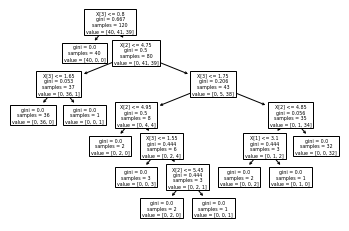

In [28]:
tree.plot_tree(tree_clf)